<a href="https://colab.research.google.com/github/rfernandes29/mlusp/blob/main/aula04_01_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métricas para avaliação de modelos

A escolha da métrica a ser otimizada depende da aplicação!

#### Métricas para regressão

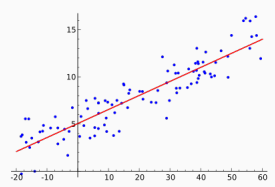

MSE (mean squared error)

$
\begin{align}
\frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2
\end{align}
$

MAE (mean absolute error)

$
\begin{align}
\frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)
\end{align}
$

#### Métricas para classificação

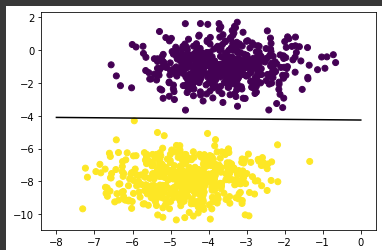

Sejam:

$
\begin{align}
TP = true \ positives \\
TN = true \ negatives \\
FP = false \ positives \ (erro \ tipo \ I)\\
FN = false \ negatives \ (erro \ tipo \ II)
\end{align}
$

Precisão

$
\begin{align}
\frac{TP}{TP+FP}
\end{align}
$

Recall / sensibilidade

$
\begin{align}
\frac{TP}{TP+FN}
\end{align}
$

Acurácia

$
\begin{align}
\frac{TP+TN}{TP+TN+FP+FN}
\end{align}
$


F1 score: média harmônica de precisão e recall

$
\begin{align}
2 \cdot \frac{precision \cdot recall}{precision + recall}
\end{align}
$

## Validação cruzada

Consiste em particionar o dataset em k subconjuntos e treinar o modelo k vezes, usando um subconjunto diferente para validação por vez e os k-1 restantes para treino.

Vamos usar uma função auxiliar que recebe uma instância de um modelo, a quantidade de partições $k$, a matriz de *features* $X$, o vetor de *targets* $y$ e uma função que computa a métrica desejada.

Experimente variar $k$ e a função de métrica nos exemplos abaixo: classificação de flores e regressão de valores de casas.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold


def train_model(model, k, X, y, score_func):
    kfolds = KFold(k)
    scores = []
    for train_idx, test_idx in kfolds.split(X, y):
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]
        model = model.fit(X_train, y_train)
        y_hat = model.predict(X_test)
        scores.append(score_func(y_test, y_hat))
    print('scores: ', np.round(scores,4), '\nmean:    ', np.round(np.mean(scores),4))

#### Classificação de flores

Dataset Iris.
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

In [ ]:
data_iris = load_iris()
df_iris = pd.DataFrame(data_iris.data, columns=data_iris.feature_names)

X_iris = df_iris.values
y_iris = data_iris.target
cols_iris = data_iris.feature_names

df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Podemos visualizar as *features* duas a duas, como no *snippet* abaixo. Experimente variar as *features* (i.e. `X_iris[:,0]` e `X_iris[:,1]`). Não se esqueça de também trocar as labels do gráfico.

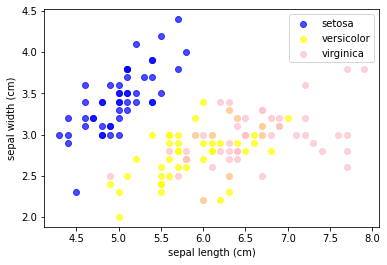

In [ ]:
X0 = X_iris[:,0]
X1 = X_iris[:,1]
colors = ["blue", "yellow", "pink"]
names = data_iris.target_names
for i, flower in enumerate(np.unique(y_iris)):
  mask = y_iris == flower
  plt.scatter(X0[mask], X1[mask], c=colors[i], alpha=0.7, label=names[i])
plt.xlabel(cols_iris[0])
plt.ylabel(cols_iris[1])
plt.legend()

# Treinando com o scikit-learn

Aqui criamos um modelo de Regressão Logística usando o pacote Scikit Learn para separarmos as diferentes classes de flores usando a largura e comprimento das sépalas.

Note que aqui usamos como métrica a acurácia, para a qual obtivemos uma média de 60% no dataset de teste considerando KFold com 5 folds.

In [ ]:
lr_iris = LogisticRegression(solver='lbfgs', max_iter=200, multi_class='multinomial')
train_model(lr_iris, 5, X_iris[:, 0:2], y_iris, accuracy_score)

scores:  [1.     0.7667 0.1667 0.7333 0.3333] 
mean:     0.6


Agora vamos testar modelos treinados nas com as dimensões das pétalas, ao invés de sépalas.

In [ ]:
lr_iris = LogisticRegression(solver='lbfgs', max_iter=100, multi_class='multinomial')
train_model(lr_iris, 5, X_iris[:, 2:4], y_iris, accuracy_score)

scores:  [1.     1.     0.8667 0.9333 0.8333] 
mean:     0.9267


## Aqui visualizamos os resultados do classificador treinado.

Como nosso exemplo usa exatamente duas características podemos classificar cada ponto do plano cartesiano. Atribuindo uma cor a cada classe nos permite ver cada ponto classificado.

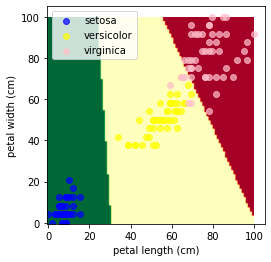

In [ ]:
x_space = np.linspace(X_iris[:, 2].min(), X_iris[:, 2].max(), 100)
y_space = np.linspace(X_iris[:, 3].min(), X_iris[:, 3].max(), 100)
XX, YY = np.meshgrid(x_space, y_space)
y_had = lr_iris.predict(np.array([XX.ravel(), YY.ravel()]).T)
y_had = y_had.reshape(100,100)
plt.imshow(-y_had, cmap="RdYlGn") # (-) para mudar a ordem das cores


scaler = MinMaxScaler()
X0 = scaler.fit_transform(X_iris[:,2,np.newaxis])*100
X1 = scaler.fit_transform(X_iris[:,3,np.newaxis])*100
colors = ["blue", "yellow", "pink"]
names = ["setosa", "versicolor", "virginica"]
for i, flower in enumerate(np.unique(y_iris)):
  mask = y_iris == flower
  plt.scatter(X0[mask], X1[mask], c=colors[i], alpha=0.7, label=names[i])
plt.xlabel(cols_iris[2])
plt.ylabel(cols_iris[3])
plt.legend()

# Imagens e gráficos possuem orientações diferentes no eixo vertical.
plt.gca().invert_yaxis()


#### Regressão de valores de NO2

Dataset *NO2* ([fonte](http://lib.stat.cmu.edu/datasets/)).

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/NO2.dat"

header = [
    "log(no2/h)",
    "log(cars/h)",
    "Temp(C)",
    "Wind spd. (m/s)",
    "D. Temp 25m/2m (C)",
    "Wind dir. (deg)",
    "Hour",
    "Day"
]
raw_df = pd.read_csv(data_url, sep="\s+",header=None, names=header)
data = raw_df.values[:, 1:]
target = raw_df.values[:, 0]

X = data[:, 0].reshape((-1,1))
y = target.reshape((-1,1))

# Target (y) - (log(no2)) Hourly values of the logarithm of the concentration of NO2 (particles)
# logarithm of the number of cars per hour
# temperature $2$ meter above ground (degree C)
# wind speed (meters/second)
# the temperature difference between $25$ and $2$ meters above ground (degree C)
# wind direction (degrees between 0 and 360)
# hour of day and day number from October 1. 2001.

raw_df.head()

,log(no2/h),log(cars/h),Temp(C),Wind spd. (m/s),D. Temp 25m/2m (C),Wind dir. (deg),Hour,Day
0,3.71844,7.69120,9.2,4.8,-0.1,74.4,20,600
1,3.10009,7.69894,6.4,3.5,-0.3,56.0,14,196
2,3.31419,4.81218,-3.7,0.9,-0.1,281.3,4,513
3,4.38826,6.95177,-7.2,1.7,1.2,74.0,23,143
4,4.34640,7.51806,-1.3,2.6,-0.1,65.0,11,115


Text(0, 0.5, 'log(no2/h)')

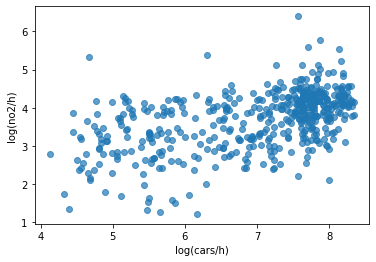

In [ ]:
plt.scatter(X[:,0], y, alpha=0.7)
plt.xlabel(header[1])
plt.ylabel(header[0])

Aqui note que nossa métrica é o erro absoluto médio. E conseguimos um erro médio (considerando KFold) de ~0.49 para este modelo com estes dados.

scores:  [0.548  0.4552 0.5188 0.4589 0.4781 0.4877 0.4842 0.5911 0.4979 0.4559] 
mean:     0.4976


Text(0, 0.5, 'log(no2/h)')

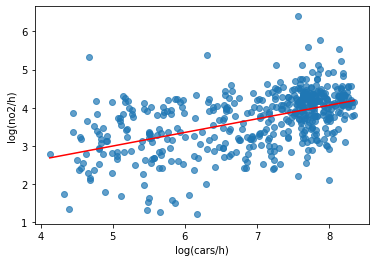

In [ ]:
lr_cars = LinearRegression()
train_model(lr_cars, 10, X, y, mean_absolute_error)
X_int = np.linspace(X[:,0].min(), X[:,0].max(), 100)
y_hat = lr_cars.predict(X_int[:, np.newaxis])
plt.scatter(X[:,0], y, alpha=0.7)
plt.plot(X_int, y_hat, c='r')
plt.xlabel(header[1])
plt.ylabel(header[0])